In [1]:
# !pip install pandas

import pandas as pd

pd.set_option('display.max_columns', 8)

# reading csv
general_data = pd.read_csv("C:/gaurav/Gaurav/Gaurav patil/User/DATA_SCIENCE/Data Analysis on Hospitals/files/test/general.csv")
prenatal_data = pd.read_csv("C:/gaurav/Gaurav/Gaurav patil/User/DATA_SCIENCE/Data Analysis on Hospitals/files/test/prenatal.csv")
sports_data = pd.read_csv("C:/gaurav/Gaurav/Gaurav patil/User/DATA_SCIENCE/Data Analysis on Hospitals/files/test/sports.csv")

# replacing columns
prenatal_data.rename(columns={'HOSPITAL':'hospital','Sex':'gender'},inplace=True)
sports_data.rename(columns={'Hospital':'hospital', 'Male/female':'gender'},inplace=True)

# merging dataframes
merged_dataframe = pd.concat([general_data , prenatal_data , sports_data] , ignore_index=True)

merged_dataframe.drop(columns=['Unnamed: 0'] , inplace=True)





In [2]:
# function for changing the gender from male , man to m and female , woman to f
def change_gender_name(gender):
    if gender == 'woman' or gender == 'female':
        return 'f'
    elif gender == 'man' or gender == 'male':
        return 'm'

# calling function in the gender column
merged_dataframe['gender'] = merged_dataframe['gender'].agg(change_gender_name)

merged_dataframe

,hospital,gender,age,height,...,mri,xray,children,months
0,general,m,33.0,1.640,...,NaN,NaN,NaN,NaN
1,general,m,48.0,1.930,...,NaN,NaN,NaN,NaN
2,general,f,23.0,1.540,...,NaN,NaN,NaN,NaN
3,general,m,27.0,1.940,...,NaN,NaN,NaN,NaN
4,general,f,22.0,1.760,...,NaN,f,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,...,f,t,NaN,NaN
1002,sports,m,20.0,5.400,...,t,f,NaN,NaN
1003,sports,m,17.0,6.089,...,f,f,NaN,NaN
1004,sports,f,16.0,6.176,...,f,t,NaN,NaN


In [3]:
#changing all the none values from the 
merged_dataframe.loc[merged_dataframe['hospital'] == 'prenatal' , 'gender'] = 'f'

merged_dataframe

,hospital,gender,age,height,...,mri,xray,children,months
0,general,m,33.0,1.640,...,NaN,NaN,NaN,NaN
1,general,m,48.0,1.930,...,NaN,NaN,NaN,NaN
2,general,f,23.0,1.540,...,NaN,NaN,NaN,NaN
3,general,m,27.0,1.940,...,NaN,NaN,NaN,NaN
4,general,f,22.0,1.760,...,NaN,f,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,...,f,t,NaN,NaN
1002,sports,m,20.0,5.400,...,t,f,NaN,NaN
1003,sports,m,17.0,6.089,...,f,f,NaN,NaN
1004,sports,f,16.0,6.176,...,f,t,NaN,NaN


In [4]:
#changing NaNs values to 0 in bmi , diagnosis , blood_test , ecg , ultrasound , mri , xray , children , months
merged_dataframe[['bmi','diagnosis' , 'blood_test', 'ecg' , 'ultrasound' , 'mri' , 'xray' , 'children' , 'months']] = merged_dataframe.loc[: , ['bmi','diagnosis' , 'blood_test', 'ecg' , 'ultrasound' , 'mri' , 'xray' , 'children' , 'months']].fillna(0)

In [5]:
# print('Data shape:' , merged_dataframe.shape)
# print(merged_dataframe.sample(n=20 , random_state = 30))
merged_dataframe

,hospital,gender,age,height,...,mri,xray,children,months
0,general,m,33.0,1.640,...,0,0,0.0,0.0
1,general,m,48.0,1.930,...,0,0,0.0,0.0
2,general,f,23.0,1.540,...,0,0,0.0,0.0
3,general,m,27.0,1.940,...,0,0,0.0,0.0
4,general,f,22.0,1.760,...,0,f,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,...,f,t,0.0,0.0
1002,sports,m,20.0,5.400,...,t,f,0.0,0.0
1003,sports,m,17.0,6.089,...,f,f,0.0,0.0
1004,sports,f,16.0,6.176,...,f,t,0.0,0.0


In [6]:
merged_dataframe['hospital'].value_counts()
ans_1_dict = merged_dataframe['hospital'].value_counts().to_dict()
ans_1_max = max(merged_dataframe['hospital'].value_counts().to_list())

for x , y in ans_1_dict.items():
    if y == ans_1_max:
        ans_1 = x
        
print('The answer to the 1st question is',ans_1)
diag_slice = merged_dataframe[(merged_dataframe['hospital'] == 'general') & (merged_dataframe['diagnosis'] == 'stomach')]

total_no_of_gen_hospital = merged_dataframe[merged_dataframe['hospital'] == 'general']

total_no_of_gen_hospital = total_no_of_gen_hospital.shape[0]

stomach_diag = diag_slice.shape[0]

ans_2 = (stomach_diag / total_no_of_gen_hospital)
# print('The answer to the 2nd question is',round(ans_2 , 3))


The answer to the 1st question is general


In [7]:
dis_slice = merged_dataframe[(merged_dataframe['hospital'] == 'sports') & (merged_dataframe['diagnosis'] == 'dislocation')]

total_no_of_sports_hospital = merged_dataframe[merged_dataframe['hospital'] == 'sports']

total_no_of_sports_hospital = total_no_of_sports_hospital.shape[0]

dis_diag = dis_slice.shape[0]

ans_3 = (dis_diag / total_no_of_sports_hospital)

# print('The answer to the 3rd question is',round(ans_3 , 3))

In [8]:
gen_age = merged_dataframe[merged_dataframe['hospital'] == 'general']
gen_age_median = gen_age['age'].median()

sports_age = merged_dataframe[merged_dataframe['hospital'] == 'sports']
sports_age_median = sports_age['age'].median()


# print('The answer to the 4th question is',int(gen_age_median - sports_age_median))

In [9]:
hosp_blood = merged_dataframe.loc[: , ['hospital' , 'blood_test']]

In [10]:
hospital_blood_max = max(hosp_blood.value_counts().to_list())
hospital_blood_dict = hosp_blood.value_counts().to_dict()

for x , y in hospital_blood_dict.items():
    if y == hospital_blood_max:
        ans_5 = x[0]
        
# print(f'The answer to the 5th question is {ans_5}, {hospital_blood_max} blood tests')

The answer to the 1st question: 15-35


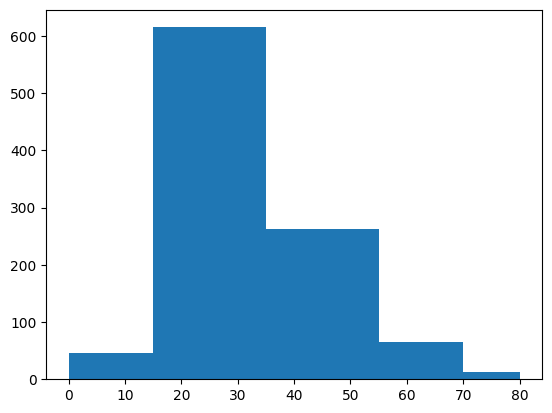

In [11]:
hospital_age = merged_dataframe.loc[: , ['age']]

import matplotlib.pyplot as plt

plt.hist(hospital_age , bins=[0 , 15 , 35 , 55 , 70,80])

print('The answer to the 1st question: 15-35')


The answer to the 2nd question: pregnancy


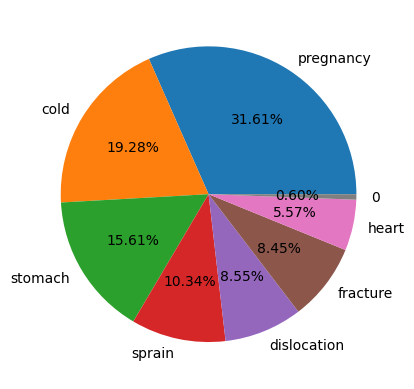

In [12]:
diagnosis_age = merged_dataframe.loc[: , ['diagnosis']]

import matplotlib.pyplot as plt

# diagnosis_age.dropna()

temp = diagnosis_age.value_counts().index.tolist()

pie_labels = []

for x in temp:
    pie_labels.append(x[0])

# print(pie_labels)
plt.pie(diagnosis_age.value_counts() , labels = pie_labels , autopct='%1.2f%%')

print('The answer to the 2nd question: pregnancy')


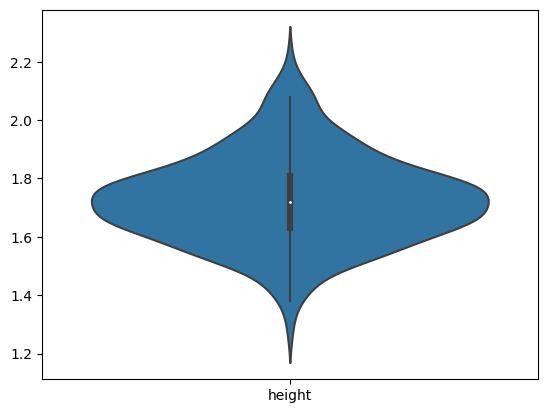

<Axes: >

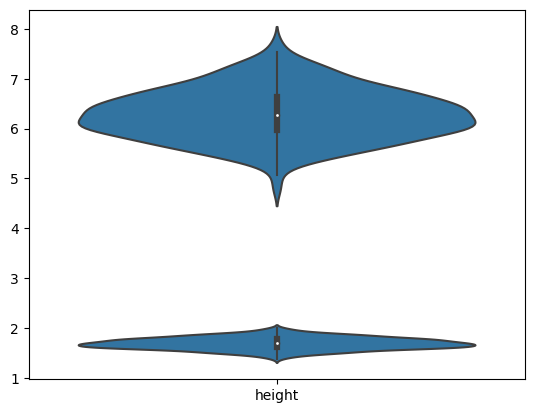

In [28]:
hospital_height = merged_dataframe[['hospital' , 'height']]
gen_height = hospital_height[hospital_height['hospital'] == 'general']
pre_height = hospital_height[hospital_height['hospital'] == 'prenatal']
spor_height = hospital_height[hospital_height['hospital'] == 'sports']

# !pip install seaborn
import seaborn as sns

sns.violinplot(data=gen_height , split=True)
plt.show()
sns.violinplot(data=pre_height , split=True)
sns.violinplot(data=spor_height , split=True)

In [35]:

pd.set_option('display.max_columns', None)

merged_dataframe[merged_dataframe['hospital'] == 'sports']

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
789,sports,f,20.0,5.871,150.0,21.3,sprain,0,f,0,t,f,0.0,0.0
790,sports,f,20.0,6.665,248.0,27.3,dislocation,0,f,0,f,t,0.0,0.0
791,sports,m,16.0,6.960,273.0,27.6,dislocation,0,f,0,f,t,0.0,0.0
792,sports,m,17.0,7.128,269.0,25.9,sprain,0,f,0,t,f,0.0,0.0
793,sports,m,19.0,5.993,209.0,28.4,dislocation,0,f,0,f,t,0.0,0.0
795,sports,f,14.0,5.793,176.0,25.7,sprain,0,f,0,t,f,0.0,0.0
796,sports,f,22.0,7.351,265.0,24.0,sprain,0,f,0,t,f,0.0,0.0
797,sports,f,21.0,6.059,189.0,25.2,fracture,0,f,0,f,t,0.0,0.0
798,sports,f,18.0,5.338,151.0,26.0,sprain,0,f,0,t,f,0.0,0.0
799,sports,m,12.0,6.164,179.0,23.0,fracture,0,f,0,f,t,0.0,0.0
